# Statistiche questionari utente

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
from scipy.stats import wilcoxon
plt.style.use('seaborn-paper')

from IPython.display import display, HTML

# palette colori:
palette_c = ['#ceddf0', '#94cce7', '#21a2d0', '#128aa3', '#1c62ba']
app = ['Apple Music', 'Tidal']

questionario1 = pd.read_csv('Questionario ' + app[0] + '.csv', index_col = 0)
questionario2 = pd.read_csv('Questionario ' + app[1] + '.csv', index_col = 0)
display(questionario1.head(6))
display(questionario2.head(6))

,User1,User2,User3,User4,User5,User6,User7,User8,User9,User10,User11
genere,Maschio,Femmina,Femmina,Femmina,Femmina,Femmina,Femmina,Maschio,Femmina,Maschio,Maschio
eta,24,23,22,26,20,22,52,55,52,50,12
situazione lavorativa,Studente,Studente,Studente,Lavoratore,Studente,Studente,Lavoratore,Lavoratore,Lavoratore,Lavoratore,Studente
istruzione,Laurea Triennale,Laurea Triennale,Diploma,Laurea Magistrale,Diploma,Laurea Triennale,Diploma,Diploma,Diploma,Diploma,Elementari
fastidioso-piacevole,7,4,6,4,5,5,3,5,6,5,6
incomprensibile-comprensibile,7,5,6,3,6,5,1,5,6,5,3


,User1,User2,User3,User4,User5,User6,User7,User8,User9,User10,User11
genere,Maschio,Femmina,Femmina,Femmina,Femmina,Femmina,Femmina,Maschio,Femmina,Maschio,Maschio
eta,24,23,22,26,20,22,52,55,52,50,12
situazione lavorativa,Studente,Studente,Stuedente,Lavoratore,Studente,Studente,Lavoratore,Lavoratore,Lavoratore,Lavoratore,Studente
istruzione,Laurea Triennale,Laurea Triennale,Diploma,Laurea Magistrale,Diploma,Laurea Triennale,Diploma,Diploma,Diploma,Diploma,Elementari
fastidioso-piacevole,7,6,4,5,3,5,2,3,5,5,6
incomprensibile-comprensibile,6,6,6,6,3,5,1,3,5,5,3


## General stats:



Gender stats


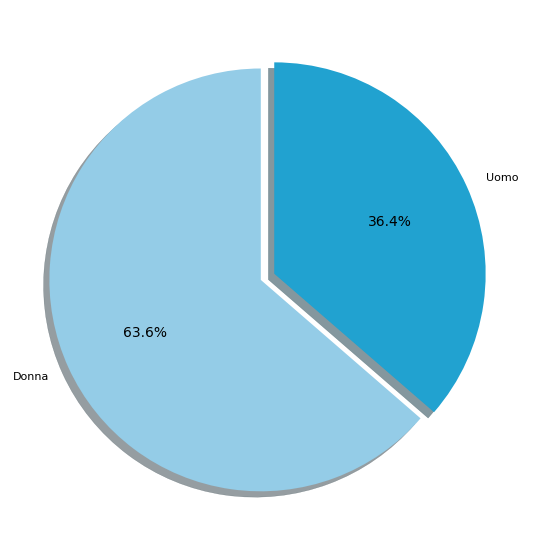



Job stats


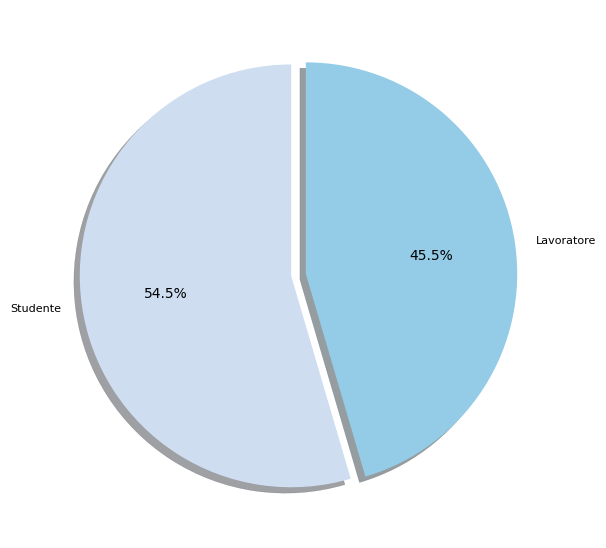



Education stats


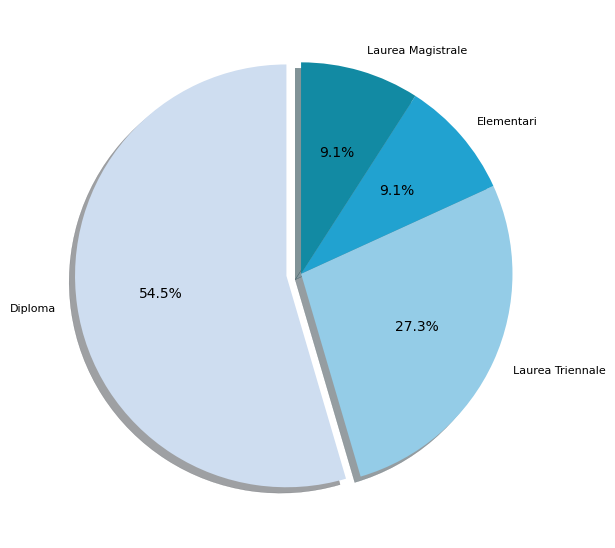



Age stats


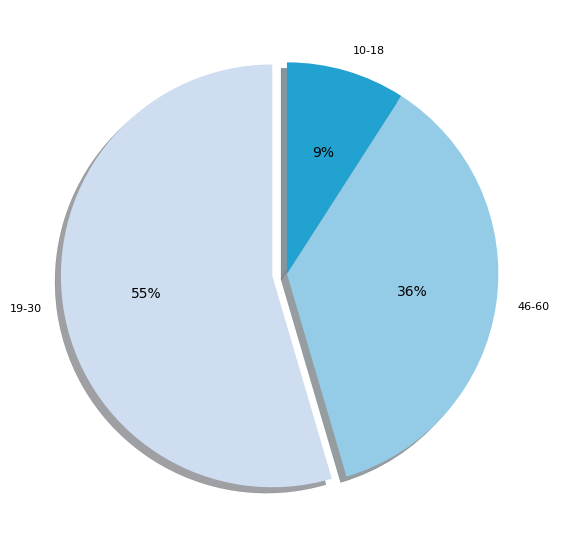

In [2]:
# gender stats
print('\n\nGender stats')
labels = ['Donna', 'Uomo']
sizes = questionario1.loc['genere'].value_counts()

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes, explode=explode, labels = labels, autopct='%1.1f%%', shadow = True, startangle = 90, colors = palette_c[1:3])
plt.show()


# job stats
print('\n\nJob stats')
labels = questionario1.loc['situazione lavorativa'].value_counts().index
sizes = questionario1.loc['situazione lavorativa'].value_counts()

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes, explode=explode, labels = labels, autopct='%1.1f%%', shadow = True, startangle = 90, colors = palette_c)
plt.show()



# education stats
print('\n\nEducation stats')
labels = questionario1.loc['istruzione'].value_counts().index
sizes = questionario1.loc['istruzione'].value_counts()

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%', shadow = True, startangle = 90, colors = palette_c)
plt.show()


# age stats
print('\n\nAge stats')
age_class = [10, 18, 30, 45, 60, 110]
labels = ['10-18', '19-30', '31-45', '46-60', '60+']
etas = [int(ele) for ele in questionario1.loc['eta']]
df_age = pd.DataFrame({'age': etas, 'group': pd.cut(etas, bins = age_class, labels = labels, right=False)})

sizes = df_age['group'].value_counts()
sizes = sizes[sizes != 0] # drop 0 value
labels = list(sizes.index)

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes, explode = explode, labels = labels, autopct='%1.0f%%', shadow = True, startangle = 90, colors = palette_c)
plt.show()



## Per ogni domanda vengono mostrate min, max, media, mediana, std e un boxplot riassuntivo e comparativo tra i due sistemi

,Min,Max,Media,Std,Mediana
Apple Music,3.0,7.0,5.090909,1.136182,5.0
Tidal,2.0,7.0,4.636364,1.501514,5.0


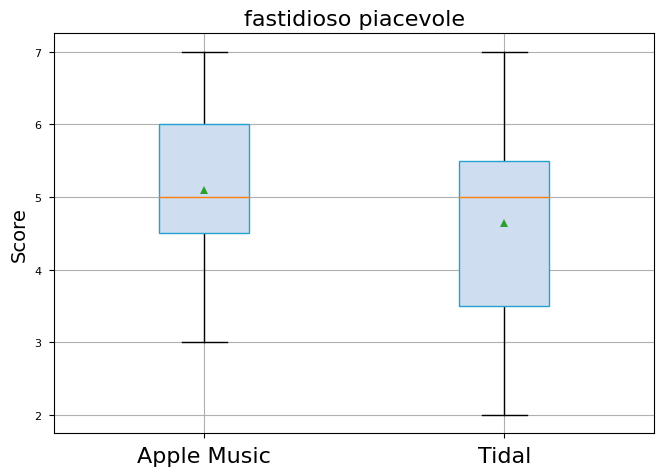

,Min,Max,Media,Std,Mediana
Apple Music,1.0,7.0,4.727273,1.737292,5.0
Tidal,1.0,6.0,4.454545,1.694912,5.0


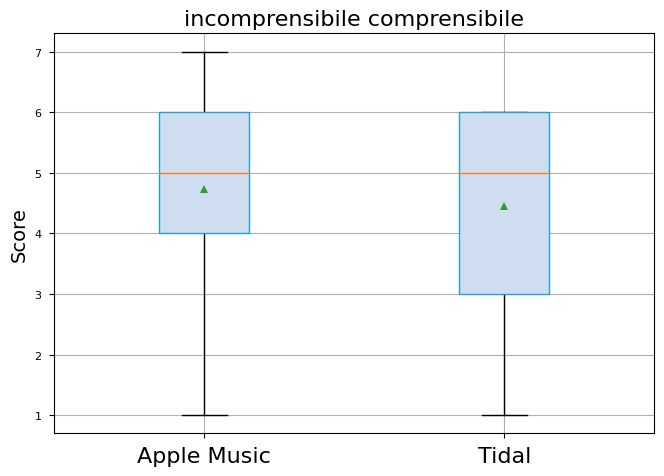

,Min,Max,Media,Std,Mediana
Apple Music,1.0,6.0,3.818182,1.537412,4.0
Tidal,1.0,6.0,3.909091,1.445998,4.0


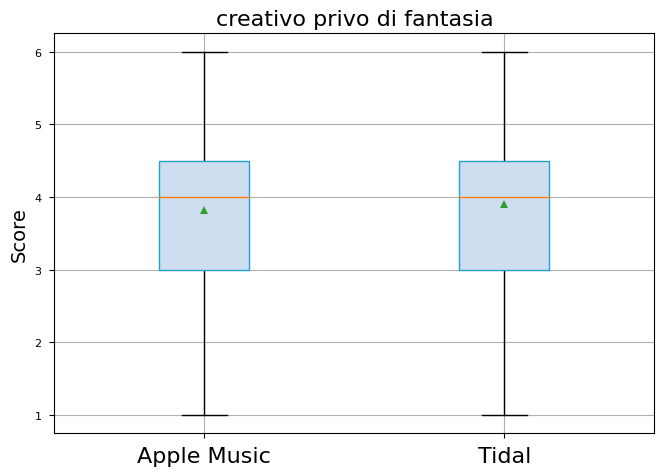

,Min,Max,Media,Std,Mediana
Apple Music,1.0,7.0,3.363636,1.747726,3.0
Tidal,1.0,7.0,3.545455,1.634848,3.0


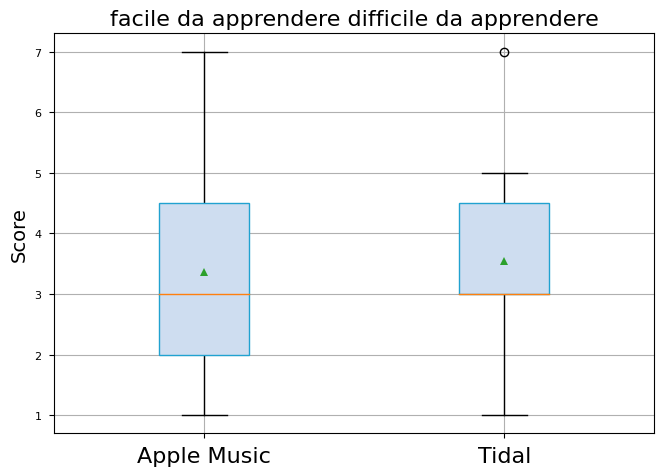

,Min,Max,Media,Std,Mediana
Apple Music,2.0,6.0,3.909091,0.94388,4.0
Tidal,2.0,6.0,4.272727,1.190874,4.0


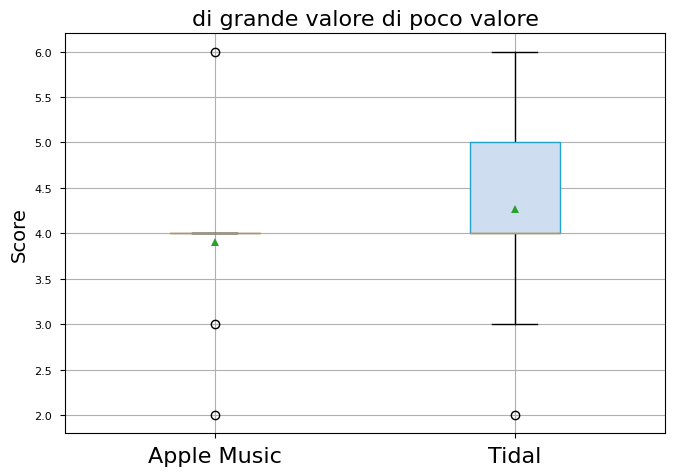

,Min,Max,Media,Std,Mediana
Apple Music,1.0,6.0,4.0,1.414214,4.0
Tidal,1.0,6.0,3.727273,1.420627,4.0


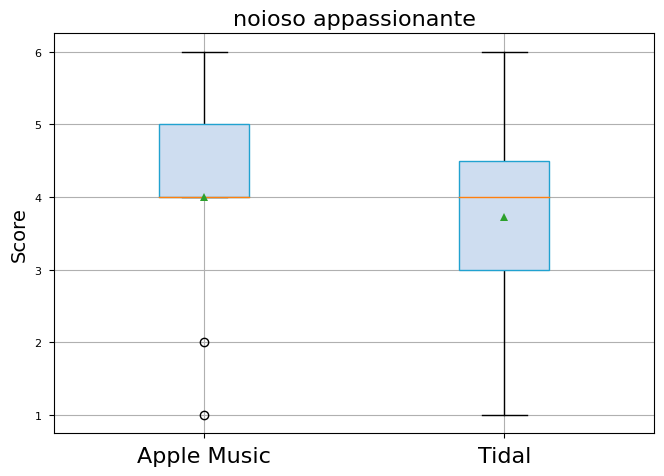

,Min,Max,Media,Std,Mediana
Apple Music,1.0,7.0,4.090909,1.814086,4.0
Tidal,1.0,7.0,4.0,1.788854,4.0


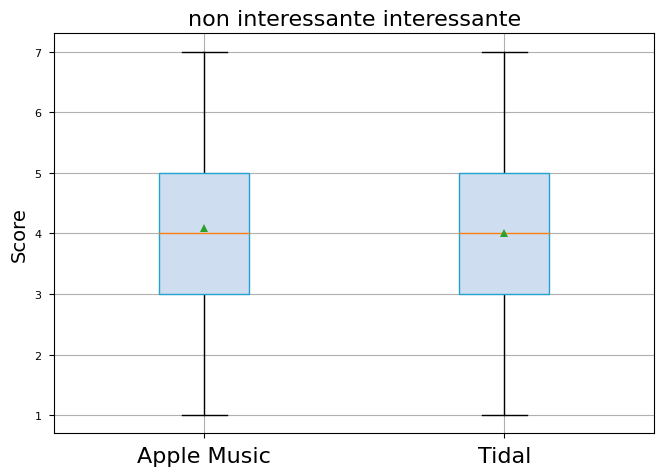

,Min,Max,Media,Std,Mediana
Apple Music,1.0,7.0,5.0,1.732051,6.0
Tidal,1.0,6.0,4.727273,1.61808,5.0


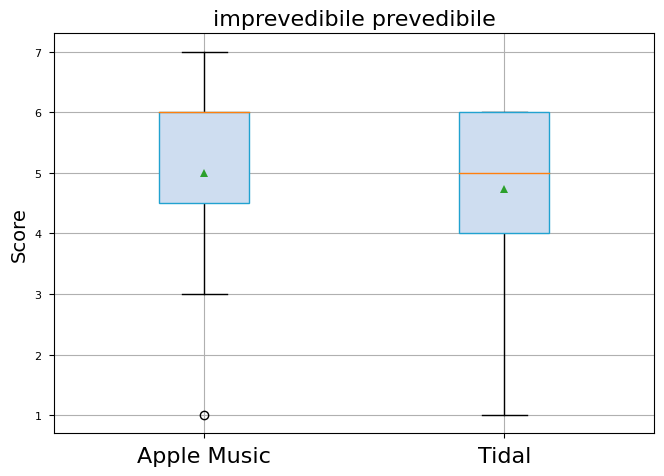

,Min,Max,Media,Std,Mediana
Apple Music,1.0,5.0,2.636364,1.361817,2.0
Tidal,2.0,5.0,3.090909,1.221028,3.0


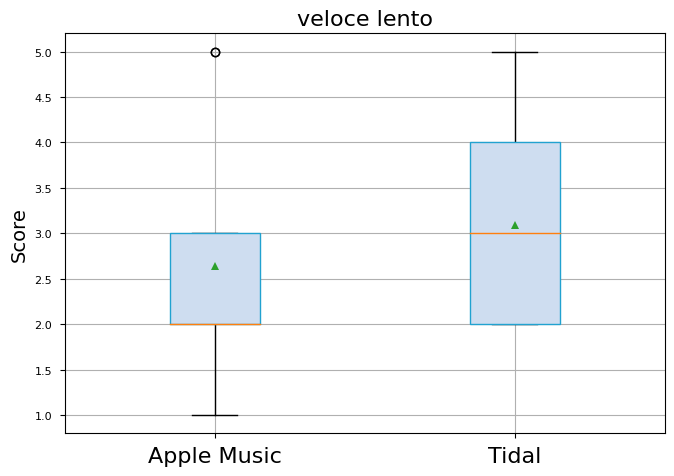

,Min,Max,Media,Std,Mediana
Apple Music,3.0,7.0,5.181818,1.401298,5.0
Tidal,2.0,7.0,4.727273,1.793929,5.0


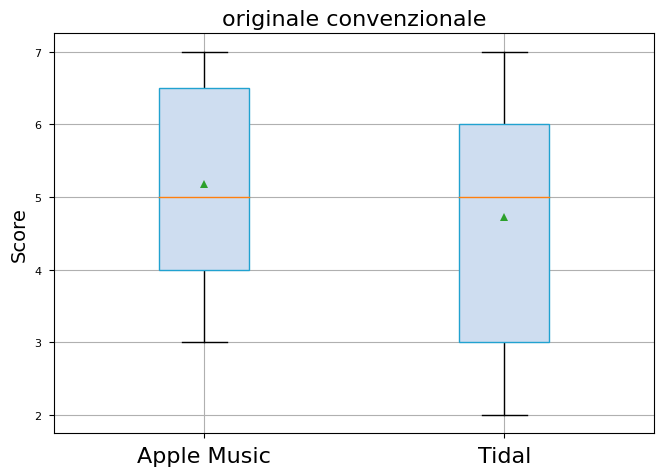

,Min,Max,Media,Std,Mediana
Apple Music,2.0,7.0,4.363636,1.361817,4.0
Tidal,2.0,6.0,4.181818,0.98165,4.0


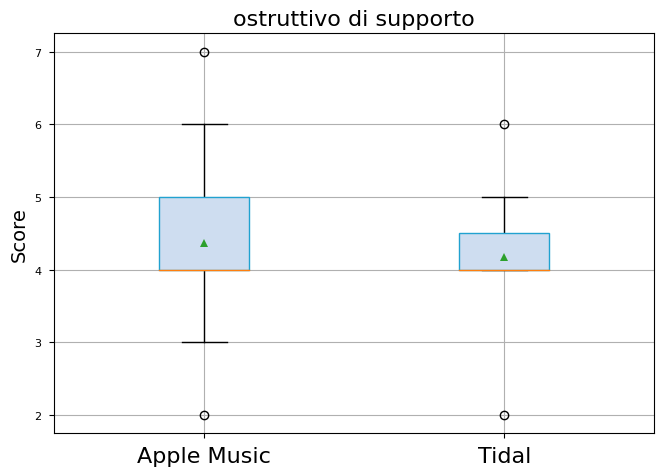

,Min,Max,Media,Std,Mediana
Apple Music,1.0,5.0,2.909091,1.221028,3.0
Tidal,1.0,5.0,3.363636,1.206045,3.0


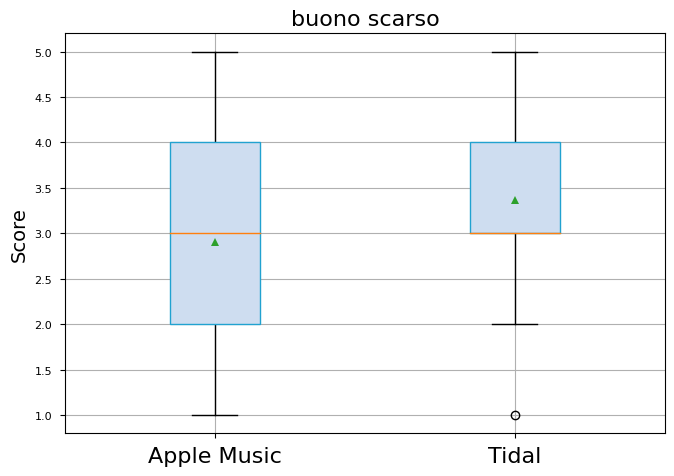

,Min,Max,Media,Std,Mediana
Apple Music,1.0,7.0,5.0,1.732051,6.0
Tidal,1.0,7.0,4.545455,1.809068,5.0


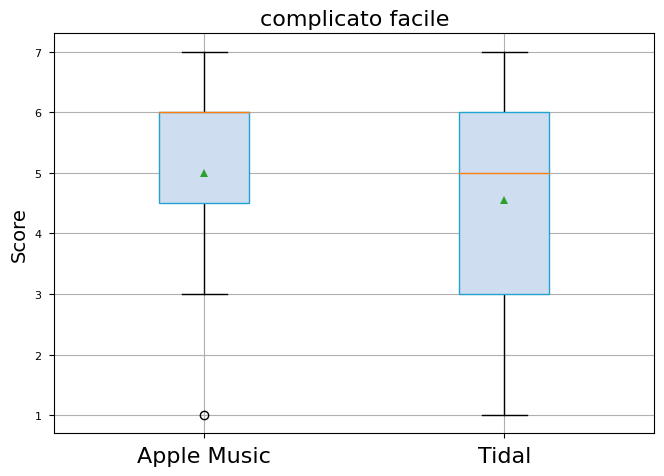

,Min,Max,Media,Std,Mediana
Apple Music,4.0,6.0,4.545455,0.8202,4.0
Tidal,3.0,5.0,4.454545,0.687552,5.0


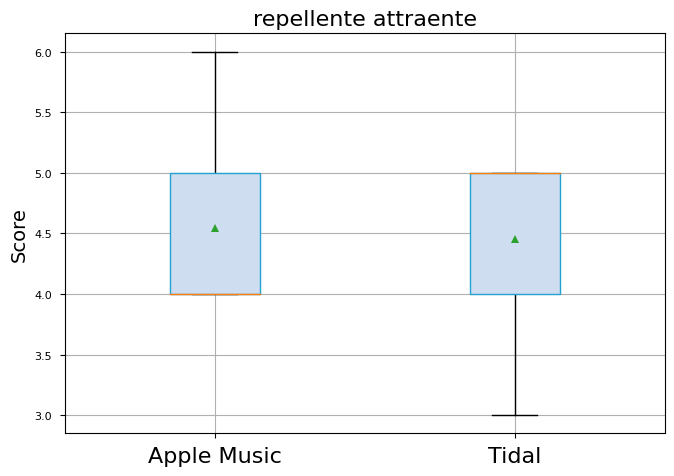

,Min,Max,Media,Std,Mediana
Apple Music,2.0,6.0,4.454545,1.572491,5.0
Tidal,2.0,6.0,4.363636,1.629278,4.0


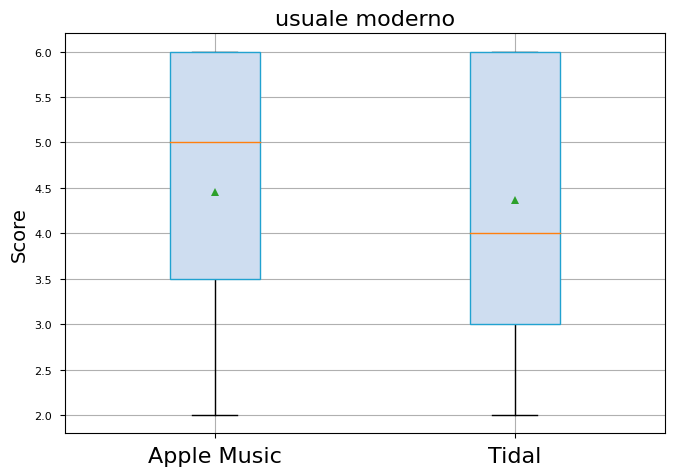

,Min,Max,Media,Std,Mediana
Apple Music,3.0,7.0,5.181818,1.401298,5.0
Tidal,2.0,7.0,4.636364,1.433369,5.0


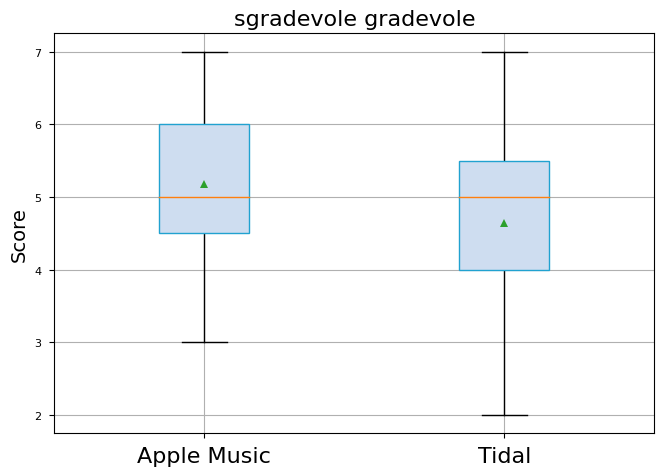

,Min,Max,Media,Std,Mediana
Apple Music,1.0,4.0,3.090909,1.221028,4.0
Tidal,1.0,4.0,3.181818,1.167748,4.0


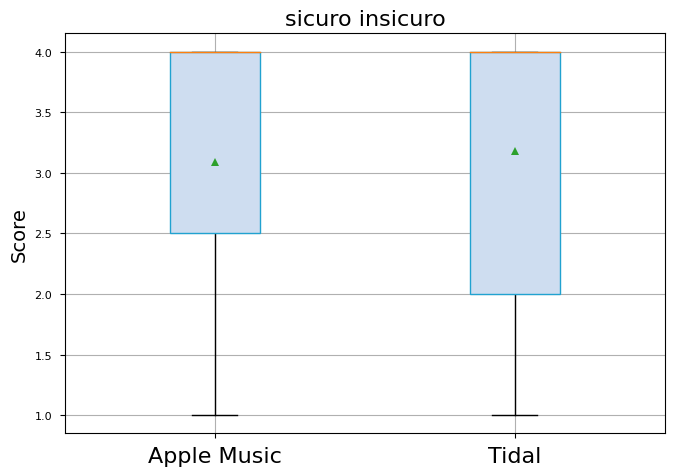

,Min,Max,Media,Std,Mediana
Apple Music,2.0,5.0,3.454545,1.035725,3.0
Tidal,2.0,6.0,3.818182,1.401298,4.0


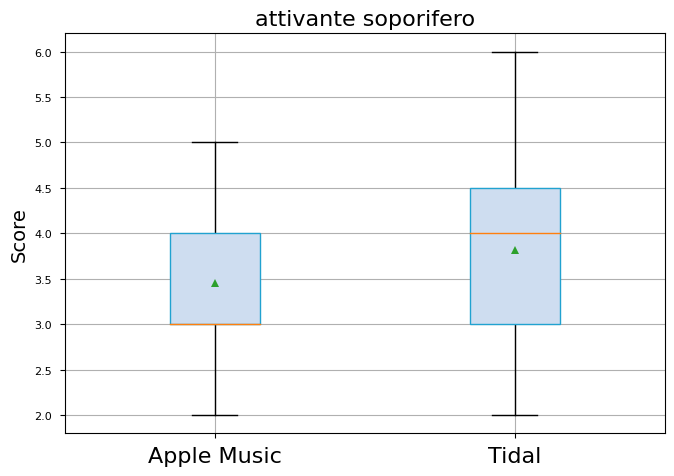

,Min,Max,Media,Std,Mediana
Apple Music,1.0,6.0,3.363636,1.911687,2.0
Tidal,1.0,7.0,3.636364,2.15744,3.0


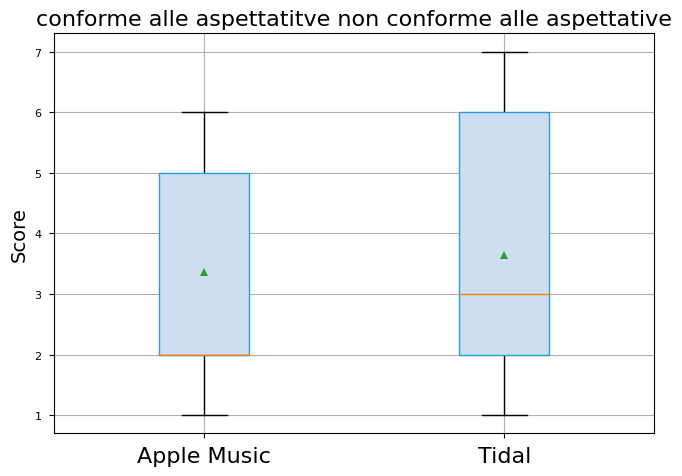

,Min,Max,Media,Std,Mediana
Apple Music,3.0,7.0,5.545455,1.128152,6.0
Tidal,2.0,6.0,4.909091,1.445998,6.0


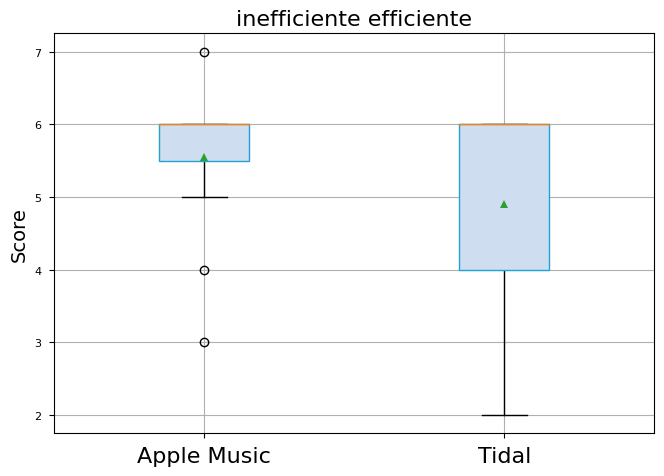

,Min,Max,Media,Std,Mediana
Apple Music,1.0,6.0,3.545455,1.439697,3.0
Tidal,2.0,7.0,4.0,1.732051,4.0


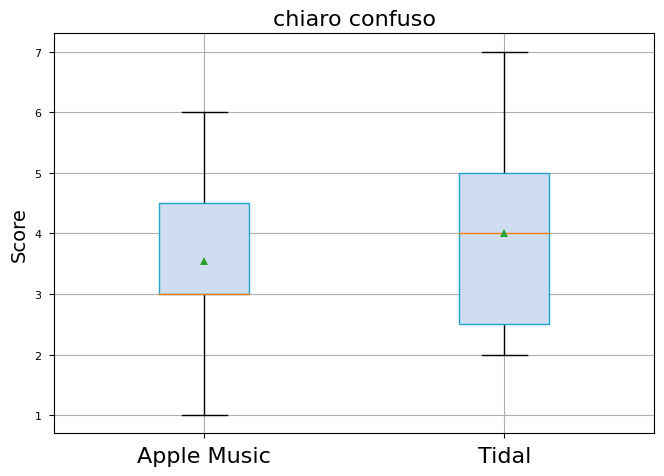

,Min,Max,Media,Std,Mediana
Apple Music,2.0,7.0,4.181818,1.32802,4.0
Tidal,1.0,6.0,3.727273,1.272078,4.0


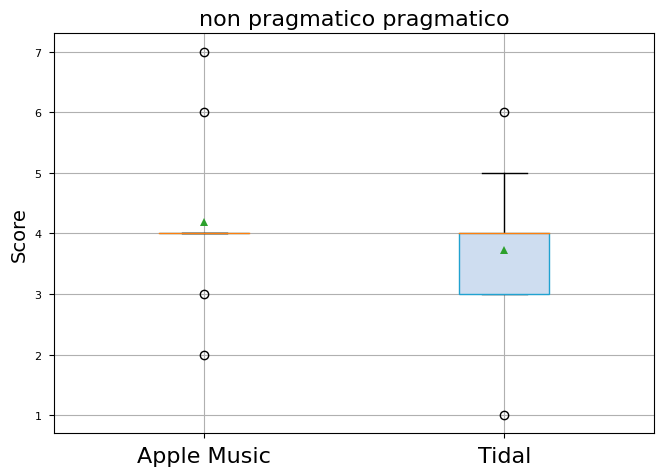

,Min,Max,Media,Std,Mediana
Apple Music,1.0,6.0,3.545455,1.809068,3.0
Tidal,2.0,6.0,3.454545,1.572491,3.0


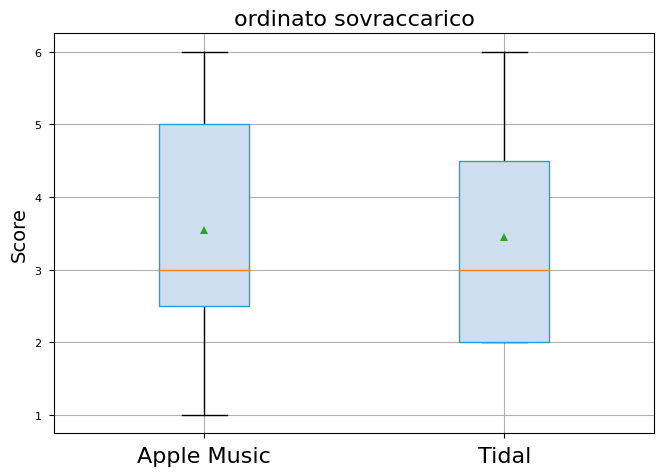

,Min,Max,Media,Std,Mediana
Apple Music,1.0,7.0,3.363636,1.629278,3.0
Tidal,1.0,7.0,3.454545,1.694912,3.0


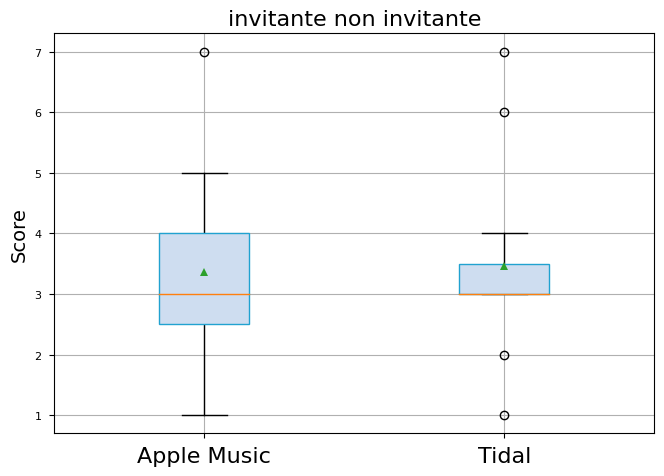

,Min,Max,Media,Std,Mediana
Apple Music,1.0,7.0,3.636364,1.566699,4.0
Tidal,2.0,7.0,4.272727,1.420627,4.0


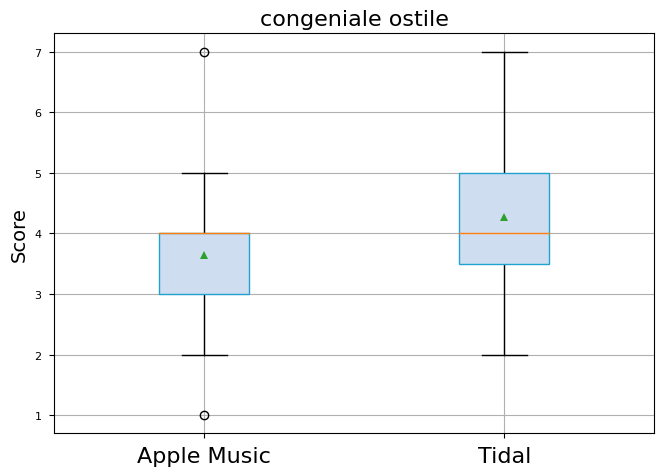

,Min,Max,Media,Std,Mediana
Apple Music,2.0,6.0,4.090909,1.375103,4.0
Tidal,2.0,6.0,4.181818,1.47093,4.0


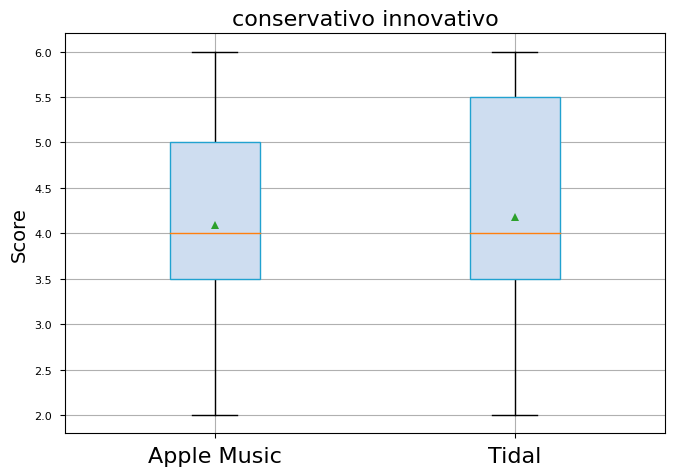

In [3]:
domande1 = questionario1[4:len(questionario1)-1]
domande2 = questionario2[4:len(questionario1)-1]

for index, row in domande1.iterrows():
    quest = domande1.loc[index].to_frame()
    quest = quest.join(domande2.loc[index], lsuffix = '-' + app[0], rsuffix = '-' + app[1])
    quest.columns = app
    quest = quest.astype('float')

    stats = pd.DataFrame(index=app, columns=['Min', 'Max', 'Media', 'Std', 'Mediana'])
    for ele in app:
        stats.loc[ele, 'Min'] = quest[ele].min()
        stats.loc[ele, 'Max'] = quest[ele].max()
        stats.loc[ele, 'Media'] = quest[ele].mean()
        stats.loc[ele, 'Std'] = quest[ele].std()
        stats.loc[ele, 'Mediana'] = quest[ele].median()
    display(stats)
    print()

    fig = plt.figure(figsize = (6, 4), dpi = 100)
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(quest, patch_artist=True, widths = 0.3, showmeans=True)

    for box in bp['boxes']:
        # change outline color
        # box.set(color='#7570a3')
        box.set(facecolor = palette_c[0])
        box.set(edgecolor = palette_c[2], linewidth=1)
        # fill with colors
        
    #bp['boxes'][0].set(color = palette_c[1])
    #bp['boxes'][1].set(color = palette_c[2])
    plt.grid()
    plt.ylabel('Score', fontsize = 14)
    ax.set_xticklabels(quest.columns, fontsize = 16)
    # title = 
    plt.title(' '.join(index.split('-')), fontsize = 16)
    plt.show()
    

    print('\n\n\n\n\n\n')

In [4]:


print(f'H0: Non ci sono differenze statisticamente significative tra statistica di {app[0]} e statistica di {app[1]}\n\n')

def perform_wilcoxon(test):
    print(f'Wilcoxon test on {test}:')
    x = [int(x) for x in domande1.loc[test].tolist()]
    # x = [5, 5, 5, 6, 4, 5, 2, 3, 4, 2, 3, 2, 5, 5, 5, 4, 3, 4, 7, 6, 6, 5, 5, 5]
    y = [int(x) for x in domande2.loc[test].tolist()]
    # y = [6, 5, 6, 6, 4, 7, 5, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 7, 3, 6, 6, 6, 4]
    w, p = wilcoxon(x = x, y = y, alternative='two-sided')
    print(f'\tw: {w}\n\tp: {p}\n')
    alpha = 0.05
    if p > alpha:
        print(f'p value is greater than alpha ({alpha}), fail to reject H0')
        print('The result is statistically nonsignificant')
        return False
    else:
        print(f'P value is minor than alpha ({alpha}), we can reject H0')
        print('Basically the two systems DO NOT share the same distribution, there are differences! YAY')
        return True


# print(domande1.index)

for ele in domande1.index:
    print(f'RESULT: {perform_wilcoxon(ele)}')
    print('\n\n')


H0: Non ci sono differenze statisticamente significative tra statistica di Apple Music e statistica di Tidal


Wilcoxon test on fastidioso-piacevole:
	w: 7.5
	p: 0.25963977138128647

p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant
RESULT: False



Wilcoxon test on incomprensibile-comprensibile:
	w: 7.5
	p: 0.5236085643722508

p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant
RESULT: False



Wilcoxon test on creativo-privo di fantasia:
	w: 10.0
	p: 0.9141283452014198

p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant
RESULT: False



Wilcoxon test on facile da apprendere-difficile da apprendere:
	w: 2.5
	p: 0.31731050786291415

p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant
RESULT: False



Wilcoxon test on di grande valore-di poco valore:
	w: 2.0
	p: 0.25683925795785656

p value is great

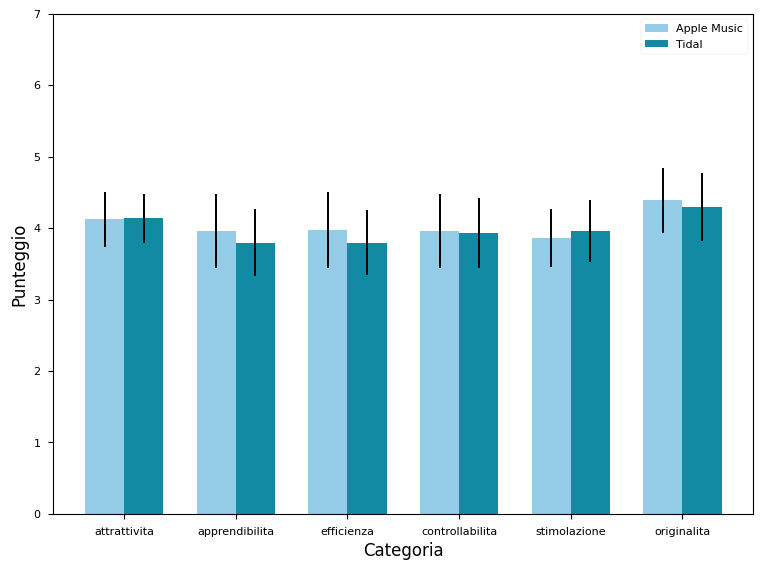



___________________________

Wilcoxon test on attrattivita:
	w: 451.5
	p: 1.0

p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant


___________________________

Wilcoxon test on apprendibilita:
	w: 83.0
	p: 0.3990751965482372

p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant


___________________________

Wilcoxon test on efficienza:
	w: 98.0
	p: 0.34474531848141454

p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant


___________________________

Wilcoxon test on controllabilita:
	w: 66.0
	p: 0.5996971931693087

p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant


___________________________

Wilcoxon test on stimolazione:
	w: 73.5
	p: 0.5897794227291635

p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant


___________________________

Wilcoxon 

In [5]:
import numpy as np, scipy.stats as st
# other interesting stats here:

categorie1 = {'attrattivita': [], 'apprendibilita': [], 'efficienza': [], 'controllabilita': [], 'stimolazione': [], 'originalita': []}

categorie1['attrattivita'].extend([int(x) for x in domande1.loc['fastidioso-piacevole'].tolist()])
categorie1['attrattivita'].extend([int(x) for x in domande1.loc['buono-scarso'].tolist()])
categorie1['attrattivita'].extend([int(x) for x in domande1.loc['repellente-attraente'].tolist()])
categorie1['attrattivita'].extend([int(x) for x in domande1.loc['sgradevole-gradevole'].tolist()])
categorie1['attrattivita'].extend([int(x) for x in domande1.loc['invitante-non invitante'].tolist()])
categorie1['attrattivita'].extend([int(x) for x in domande1.loc['congeniale-ostile'].tolist()])

categorie1['apprendibilita'].extend([int(x) for x in domande1.loc['incomprensibile-comprensibile'].tolist()])
categorie1['apprendibilita'].extend([int(x) for x in domande1.loc['facile da apprendere-difficile da apprendere'].tolist()])
categorie1['apprendibilita'].extend([int(x) for x in domande1.loc['non pragmatico-pragmatico'].tolist()])
categorie1['apprendibilita'].extend([int(x) for x in domande1.loc['ordinato-sovraccarico'].tolist()])

categorie1['efficienza'].extend([int(x) for x in domande1.loc['veloce-lento'].tolist()])
categorie1['efficienza'].extend([int(x) for x in domande1.loc['inefficiente-efficiente'].tolist()])
categorie1['efficienza'].extend([int(x) for x in domande1.loc['non pragmatico-pragmatico'].tolist()])
categorie1['efficienza'].extend([int(x) for x in domande1.loc['ordinato-sovraccarico'].tolist()])

categorie1['controllabilita'].extend([int(x) for x in domande1.loc['imprevedibile-prevedibile'].tolist()])
categorie1['controllabilita'].extend([int(x) for x in domande1.loc['ostruttivo-di supporto'].tolist()])
categorie1['controllabilita'].extend([int(x) for x in domande1.loc['sicuro-insicuro'].tolist()])
categorie1['controllabilita'].extend([int(x) for x in domande1.loc['conforme alle aspettatitve-non conforme alle aspettative'].tolist()])

categorie1['stimolazione'].extend([int(x) for x in domande1.loc['di grande valore-di poco valore'].tolist()])
categorie1['stimolazione'].extend([int(x) for x in domande1.loc['noioso-appassionante'].tolist()])
categorie1['stimolazione'].extend([int(x) for x in domande1.loc['non interessante-interessante'].tolist()])
categorie1['stimolazione'].extend([int(x) for x in domande1.loc['attivante-soporifero'].tolist()])

categorie1['originalita'].extend([int(x) for x in domande1.loc['creativo-privo di fantasia'].tolist()])
categorie1['originalita'].extend([int(x) for x in domande1.loc['originale-convenzionale'].tolist()])
categorie1['originalita'].extend([int(x) for x in domande1.loc['usuale-moderno'].tolist()])
categorie1['originalita'].extend([int(x) for x in domande1.loc['conservativo-innovativo'].tolist()])



categorie2 = {'attrattivita': [], 'apprendibilita': [], 'efficienza': [], 'controllabilita': [], 'stimolazione': [], 'originalita': []}

categorie2['attrattivita'].extend([int(x) for x in domande2.loc['fastidioso-piacevole'].tolist()])
categorie2['attrattivita'].extend([int(x) for x in domande2.loc['buono-scarso'].tolist()])
categorie2['attrattivita'].extend([int(x) for x in domande2.loc['repellente-attraente'].tolist()])
categorie2['attrattivita'].extend([int(x) for x in domande2.loc['sgradevole-gradevole'].tolist()])
categorie2['attrattivita'].extend([int(x) for x in domande2.loc['invitante-non invitante'].tolist()])
categorie2['attrattivita'].extend([int(x) for x in domande2.loc['congeniale-ostile'].tolist()])

categorie2['apprendibilita'].extend([int(x) for x in domande2.loc['incomprensibile-comprensibile'].tolist()])
categorie2['apprendibilita'].extend([int(x) for x in domande2.loc['facile da apprendere-difficile da apprendere'].tolist()])
categorie2['apprendibilita'].extend([int(x) for x in domande2.loc['non pragmatico-pragmatico'].tolist()])
categorie2['apprendibilita'].extend([int(x) for x in domande2.loc['ordinato-sovraccarico'].tolist()])

categorie2['efficienza'].extend([int(x) for x in domande2.loc['veloce-lento'].tolist()])
categorie2['efficienza'].extend([int(x) for x in domande2.loc['inefficiente-efficiente'].tolist()])
categorie2['efficienza'].extend([int(x) for x in domande2.loc['non pragmatico-pragmatico'].tolist()])
categorie2['efficienza'].extend([int(x) for x in domande2.loc['ordinato-sovraccarico'].tolist()])

categorie2['controllabilita'].extend([int(x) for x in domande2.loc['imprevedibile-prevedibile'].tolist()])
categorie2['controllabilita'].extend([int(x) for x in domande2.loc['ostruttivo-di supporto'].tolist()])
categorie2['controllabilita'].extend([int(x) for x in domande2.loc['sicuro-insicuro'].tolist()])
categorie2['controllabilita'].extend([int(x) for x in domande2.loc['conforme alle aspettatitve-non conforme alle aspettative'].tolist()])

categorie2['stimolazione'].extend([int(x) for x in domande2.loc['di grande valore-di poco valore'].tolist()])
categorie2['stimolazione'].extend([int(x) for x in domande2.loc['noioso-appassionante'].tolist()])
categorie2['stimolazione'].extend([int(x) for x in domande2.loc['non interessante-interessante'].tolist()])
categorie2['stimolazione'].extend([int(x) for x in domande2.loc['attivante-soporifero'].tolist()])

categorie2['originalita'].extend([int(x) for x in domande2.loc['creativo-privo di fantasia'].tolist()])
categorie2['originalita'].extend([int(x) for x in domande2.loc['originale-convenzionale'].tolist()])
categorie2['originalita'].extend([int(x) for x in domande2.loc['usuale-moderno'].tolist()])
categorie2['originalita'].extend([int(x) for x in domande2.loc['conservativo-innovativo'].tolist()])



df_categ1 = pd.DataFrame(index = [], columns = ['mean', 'std', 'interval', 'data'])
for categ in categorie1:
    df_categ1.loc[categ + ' - ' + app[0], 'mean'] = np.mean(categorie1[categ])
    df_categ1.loc[categ + ' - ' + app[0], 'std'] = np.std(categorie1[categ])
    df_categ1.loc[categ + ' - ' + app[0], 'interval'] = st.t.interval(0.95, len(categorie1[categ])-1, loc = np.mean(categorie1[categ]), scale = st.sem(categorie1[categ]))
    df_categ1.at[categ + ' - ' + app[0], 'data'] = categorie1[categ]

df_categ2 = pd.DataFrame(index = [], columns = ['mean', 'std', 'interval', 'data'])
for categ in categorie2:
    df_categ2.loc[categ + ' - ' + app[1], 'mean'] = np.mean(categorie2[categ])
    df_categ2.loc[categ + ' - ' + app[1], 'std'] = np.std(categorie2[categ])
    df_categ2.loc[categ + ' - ' + app[1], 'interval'] = st.t.interval(0.95, len(categorie2[categ])-1, loc = np.mean(categorie2[categ]), scale = st.sem(categorie2[categ]))
    df_categ2.at[categ + ' - ' + app[1], 'data'] = categorie2[categ]

#display(df_categ1)
#display(df_categ2)

fig = plt.figure(figsize = (7, 5), dpi = 100)
ax = fig.add_axes([0, 0, 1, 1])
X = np.arange(len(categorie1))
bar_width = 0.35
print()
yerr1 = df_categ1['mean'] - [ele[1] for ele in df_categ1['interval']]
yerr2 = df_categ2['mean'] - [ele[1] for ele in df_categ2['interval']]
ax.bar(X, df_categ1['mean'], yerr = yerr1, width = bar_width, label = app[0], color = palette_c[1])
ax.bar(X + bar_width, df_categ2['mean'], yerr = yerr2, width = bar_width, label = app[1], color = palette_c[3])
ax.set_xlabel('Categoria', fontsize = 12)
ax.set_ylabel('Punteggio', fontsize = 12)
ax.set_ylim([0,7])
ax.set_xticks(X + bar_width /2)
ax.set_xticklabels([ele for ele in categorie1])
ax.legend()
# plt.grid()
plt.show()



# perform Wilcoxon on every category:
for categ in categorie1:
    print('\n\n___________________________\n')
    print(f'Wilcoxon test on {categ}:')
    x = df_categ1.loc[categ + ' - ' + app[0], 'data']
    y = df_categ2.loc[categ + ' - ' + app[1], 'data']
    w, p = wilcoxon(x = x, y = y, alternative='two-sided')
    print(f'\tw: {w}\n\tp: {p}\n')
    alpha = 0.05
    if p > alpha:
        print(f'p value is greater than alpha ({alpha}), fail to reject H0')
        print('The result is statistically nonsignificant')
    else:
        print(f'P value is minor than alpha ({alpha}), we can reject H0')
        print('Basically the two systems DO NOT share the same distribution, there are differences! YAY')
    
